In [12]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    
    Parameters:
    case (int): An integer to specify which type of function to generate. Must be 1, 2, 3, or 4.
    
    Returns:
    QuantumCircuit: A quantum circuit representing the specified Deutsch function.
    """
    
    # Validate the input to ensure it's one of the allowed cases.
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
    
    # Create a new quantum circuit with 2 qubits.
    # One qubit is for the function input and the other is an ancilla qubit.
    f = QuantumCircuit(2)
    
    # For cases 2 and 3, apply a CNOT gate.
    # This makes the function 'balanced' as it flips the ancilla qubit based on the input qubit.
    if case in [2, 3]:
        f.cx(0, 1)
    
    # For cases 3 and 4, apply an X gate to the ancilla qubit.
    # This inverts the ancilla qubit, affecting the function's output.
    if case in [3, 4]:
        f.x(1)
    
    # Return the constructed quantum circuit.
    return f


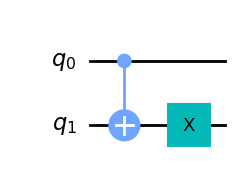

In [17]:
deutsch_function(3).draw()

In [10]:
from qiskit import QuantumCircuit

def compile_circuit(function: QuantumCircuit):
    """
    Compiles a quantum circuit for use in Deutsch's algorithm.
    
    Parameters:
    function (QuantumCircuit): The oracle function represented as a quantum circuit.
    
    Returns:
    QuantumCircuit: The compiled quantum circuit for Deutsch's algorithm.
    """
    
    # Determine the number of qubits in the oracle function.
    # Subtract 1 because one qubit is used as an ancilla qubit.
    n = function.num_qubits - 1
    
    # Create a new quantum circuit with n+1 qubits and n classical bits for measurement.
    qc = QuantumCircuit(n + 1, n)
    
    # Initialize the last qubit to |1> and apply Hadamard gates to all qubits.
    # This prepares the initial state for Deutsch's algorithm.
    qc.x(n)
    qc.h(range(n + 1))
    
    # Add a barrier for visual separation in circuit diagrams.
    qc.barrier()
    
    # Compose the given oracle function into the circuit.
    # This is the "black box" function we are trying to evaluate.
    qc.compose(function, inplace=True)
    
    # Add another barrier for visual separation.
    qc.barrier()
    
    # Apply Hadamard gates to the first n qubits.
    # This is part of the algorithm to interfere the states in a way that helps us solve the problem.
    qc.h(range(n))
    
    # Measure the first n qubits and store the results in classical bits.
    qc.measure(range(n), range(n))
    
    # Return the compiled quantum circuit.
    return qc


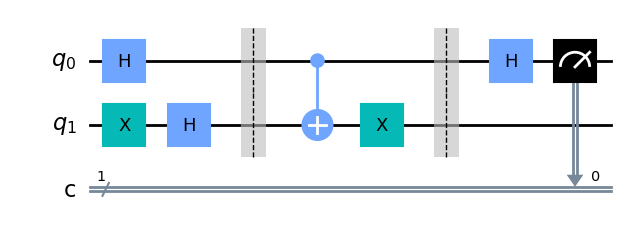

In [11]:
compile_circuit(
    deutsch_function(3)
).draw()

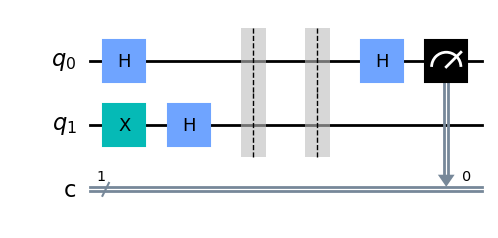

In [18]:
compile_circuit(
    deutsch_function(1)
).draw()

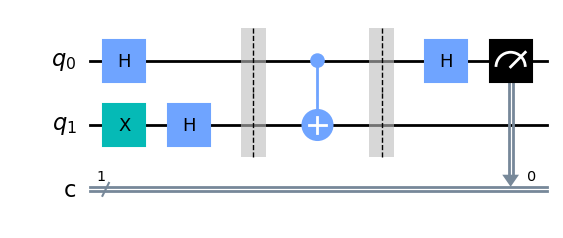

In [19]:
compile_circuit(
    deutsch_function(2)
).draw()

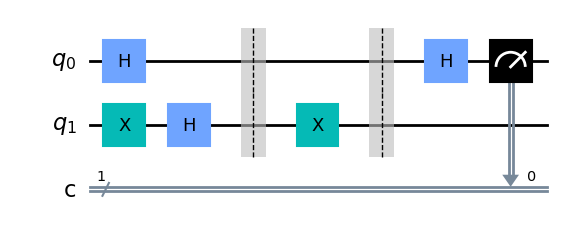

In [20]:
compile_circuit(
    deutsch_function(4)
).draw()

In [21]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    
    Parameters:
    function (QuantumCircuit): The oracle function represented as a quantum circuit.
    
    Returns:
    str: "constant" if the function is constant, "balanced" if the function is balanced.
    """
    
    # Use the `compile_circuit` function to prepare a complete quantum circuit for Deutsch's algorithm.
    # This function takes the oracle (the function we're trying to analyze) and adds necessary gates
    # to perform Deutsch's algorithm. The resulting circuit is stored in the variable `qc`.
    qc = compile_circuit(function)
    
    # Use Qiskit's AerSimulator to simulate the quantum circuit.
    # We specify that we only want one "shot" (one run of the algorithm) because Deutsch's algorithm
    # is deterministic and doesn't require multiple runs to get an accurate result.
    # The `memory=True` flag allows us to keep track of the individual measurement results.
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    
    # Retrieve the measurement results from the simulation.
    # Since we specified only one shot, we'll get one result string, which we store in the variable `measurements`.
    measurements = result.get_memory()
    
    # Analyze the measurement result to determine the nature of the function.
    # If the first qubit (the only one we're interested in for Deutsch's algorithm) is measured as '0',
    # then the function is constant. Otherwise, it's balanced.
    # We return this result as a string.
    if measurements[0] == '0':
        return "constant"
    return "balanced"


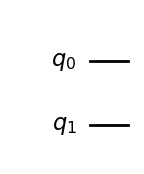

'constant'

In [23]:
f = deutsch_function(1)
display(f.draw())
deutsch_algorithm(f)

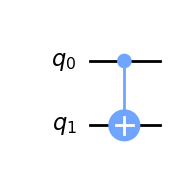

'balanced'

In [24]:
f = deutsch_function(2)
display(f.draw())
deutsch_algorithm(f)

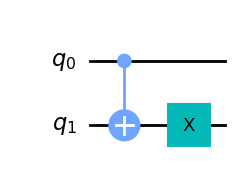

'balanced'

In [25]:
f = deutsch_function(3)
display(f.draw())
deutsch_algorithm(f)

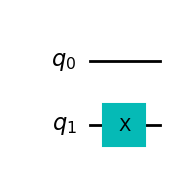

'constant'

In [26]:
f = deutsch_function(4)
display(f.draw())
deutsch_algorithm(f)